# KMeans Clustering on Candy Dataset
This notebook demonstrates how to use KMeans clustering to group candies based on their features. We will use the `candy.csv` dataset, apply KMeans from scikit-learn, and visualize the resulting clusters.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans

**Importing Required Libraries**
We import `pandas` for data manipulation and `KMeans` from scikit-learn to perform clustering.

In [2]:
dataset = pd.read_csv('../data/candy.csv')
dataset.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


**Loading and Previewing the Dataset**
We load the candy dataset from a CSV file and display the first 10 rows to understand its structure and contents.

In [3]:
X = dataset.drop('competitorname', axis=1)

**Selecting Features for Clustering**
We remove the 'competitorname' column from the dataset to use only numerical features for clustering.

In [6]:
kmeans = KMeans(n_clusters=4).fit(X)
print(len(kmeans.cluster_centers_))

4


**Fitting the KMeans Model**
We fit the KMeans algorithm to our data, specifying 4 clusters. The number of cluster centers found is printed to confirm the model's configuration.

In [7]:
kmeans.predict(X)

array([1, 1, 0, 3, 3, 3, 1, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 1, 0, 3, 3,
       1, 1, 1, 1, 0, 1, 2, 3, 0, 3, 2, 1, 3, 1, 2, 1, 1, 3, 1, 1, 2, 1,
       0, 0, 3, 2, 0, 3, 0, 2, 2, 2, 2, 0, 1, 0, 3, 0, 1, 1, 0, 3, 2, 1,
       1, 3, 1, 0, 0, 0, 0, 1, 3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3],
      dtype=int32)

**Predicting Cluster Labels**
We use the trained KMeans model to predict the cluster group for each candy based on its features.

In [9]:
dataset['group'] = kmeans.predict(X)
dataset.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,group
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,3
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,3


**Assigning Cluster Groups and Previewing Results**
We add the predicted cluster group as a new column in the dataset and display the updated DataFrame to see the group assignments.

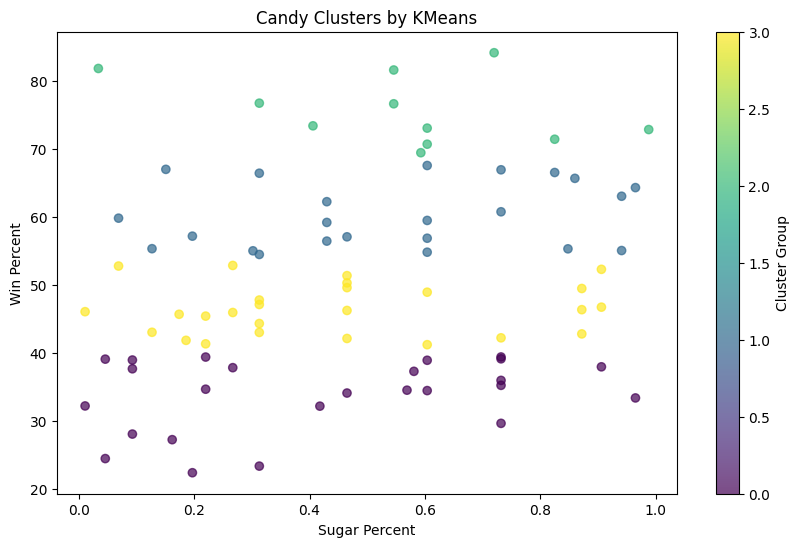

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    dataset['sugarpercent'],
    dataset['winpercent'],
    c=dataset['group'],
    cmap='viridis',
    alpha=0.7
)
plt.xlabel('Sugar Percent')
plt.ylabel('Win Percent')
plt.title('Candy Clusters by KMeans')
plt.colorbar(scatter, label='Cluster Group')
plt.show()

**Visualizing the Clusters**
We create a scatter plot of candies using sugar percent and win percent as axes, coloring each point by its assigned cluster group. This helps us visually interpret the clustering results.